In [1]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [34]:
# Set your username and token here!
username = 'jlau'
token = ''

# Set the datastream and start/enddates
datastream = 'bnfparS10.b1' #specific type of data and instrument we are looking at
startdate = '2025-04-01' #date can also be changed
enddate = '2025-04-30T23:59:59'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_par = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

datastream = 'bnfparS10.b1'
result_smp = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] bnfparS10.b1.20250409.000000.nc
[DOWNLOADING] bnfparS10.b1.20250428.000000.nc
[DOWNLOADING] bnfparS10.b1.20250402.000000.nc
[DOWNLOADING] bnfparS10.b1.20250414.000000.nc
[DOWNLOADING] bnfparS10.b1.20250407.000000.nc
[DOWNLOADING] bnfparS10.b1.20250420.000000.nc
[DOWNLOADING] bnfparS10.b1.20250429.000000.nc
[DOWNLOADING] bnfparS10.b1.20250416.000000.nc
[DOWNLOADING] bnfparS10.b1.20250426.000000.nc
[DOWNLOADING] bnfparS10.b1.20250424.000000.nc
[DOWNLOADING] bnfparS10.b1.20250425.000000.nc
[DOWNLOADING] bnfparS10.b1.20250427.000000.nc
[DOWNLOADING] bnfparS10.b1.20250422.000000.nc
[DOWNLOADING] bnfparS10.b1.20250413.000000.nc
[DOWNLOADING] bnfparS10.b1.20250408.000000.nc
[DOWNLOADING] bnfparS10.b1.20250421.000000.nc
[DOWNLOADING] bnfparS10.b1.20250417.000000.nc
[DOWNLOADING] bnfparS10.b1.20250406.000000.nc
[DOWNLOADING] bnfparS10.b1.20250411.000000.nc
[DOWNLOADING] bnfparS10.b1.20250412.000000.nc
[DOWNLOADING] bnfparS10.b1.20250423.000000.nc
[DOWNLOADING] bnfparS10.b1.2025041

In [35]:
par = act.io.read_arm_netcdf(result_par)
par

<xarray.Dataset> Size: 8MB
Dimensions:             (time: 43200, bound: 2)
Coordinates:
  * time                (time) datetime64[ns] 346kB 2025-04-01 ... 2025-04-30...
Dimensions without coordinates: bound
Data variables: (12/38)
    base_time           (time) datetime64[ns] 346kB 2025-04-01 ... 2025-04-30
    time_offset         (time) datetime64[ns] 346kB 2025-04-01 ... 2025-04-30...
    time_bounds         (time, bound) object 691kB dask.array<chunksize=(1440, 2), meta=np.ndarray>
    batt_volt_min       (time) float32 173kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_batt_volt_min    (time) int32 173kB dask.array<chunksize=(1440,), meta=np.ndarray>
    panel_temp          (time) float32 173kB dask.array<chunksize=(1440,), meta=np.ndarray>
    ...                  ...
    qc_par_6_uwell      (time) int32 173kB dask.array<chunksize=(1440,), meta=np.ndarray>
    par_6_uwell_std     (time) float32 173kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_par_6_uwell_std  (time) int32 173kB dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                 (time) float32 173kB 34.34 34.34 34.34 ... 34.34 34.34
    lon                 (time) float32 173kB -87.35 -87.35 ... -87.35 -87.35
    alt                 (time) float32 173kB 284.0 284.0 284.0 ... 284.0 284.0
Attributes: (12/17)
    command_line:          par_ingest -s bnf -f S10
    Conventions:           ARM-1.3
    process_version:       ingest-par-1.0-0.el7
    dod_version:           par-b1-2.0
    input_source:          /data/collection/bnf/bnfparS10.00/PAR.202504010000...
    site_id:               bnf
    ...                    ...
    doi:                   10.5439/2204125
    history:               created by user dsmgr on machine prod-proc3.adc.ar...
    _file_dates:           ['20250401', '20250402', '20250403', '20250404', '...
    _file_times:           ['000000', '000000', '000000', '000000', '000000',...
    _datastream:           bnfparS10.b1
    _arm_standards_flag:   1

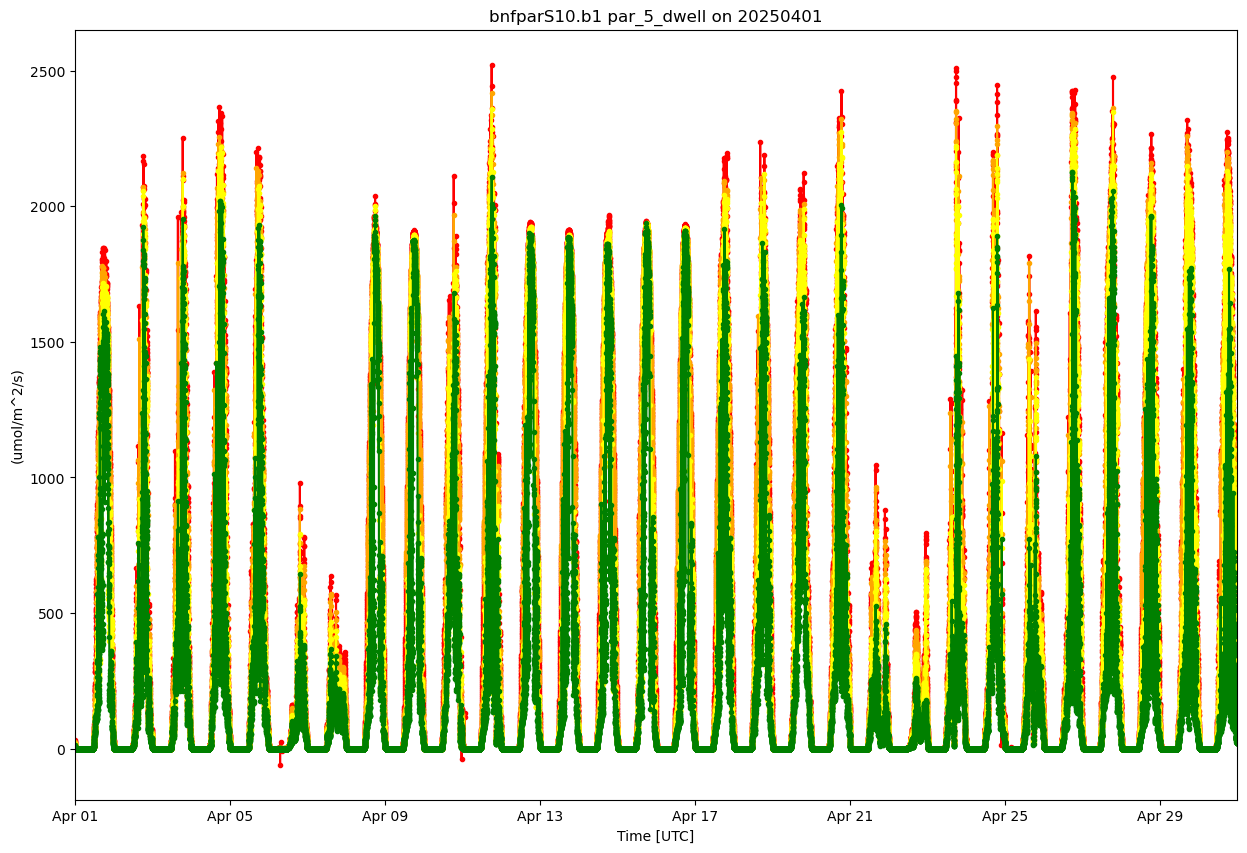

In [36]:
par.clean.cleanup()
variable1 = 'par_1_dwell'
variable3 = 'par_3_dwell'
variable4 = 'par_4_dwell'
variable5 = 'par_5_dwell'
# Next, let's take a look at visualizing the quality control information
# Create a plotting display object with 2 plots
display = act.plotting.TimeSeriesDisplay(par, figsize=(15, 10))

# Plot up the variable in the first plot
display.plot(variable1, subplot_index=(0,), color='red')
display.plot(variable3, subplot_index=(0,), color='orange')
display.plot(variable4, subplot_index=(0,), color='yellow')
display.plot(variable5, subplot_index=(0,), color='green')

plt.show()

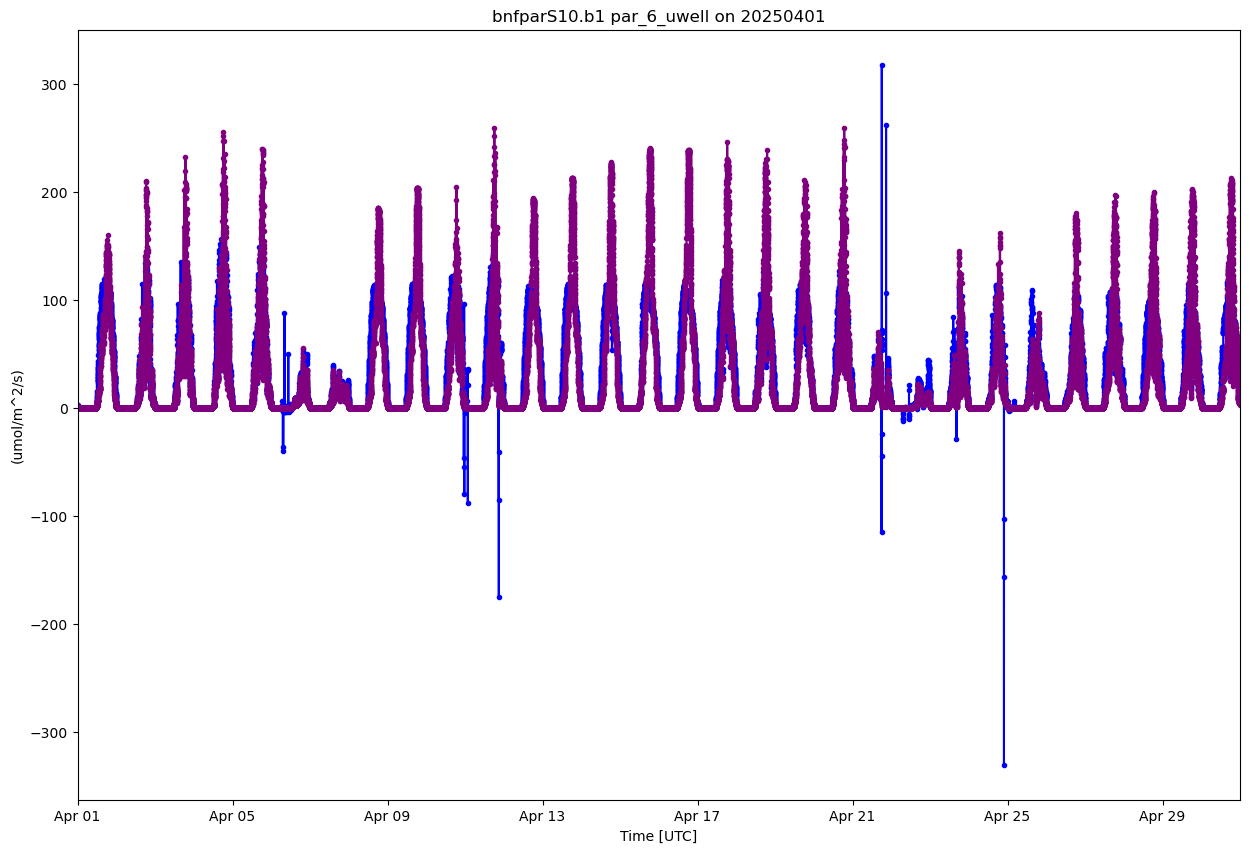

In [37]:
par.clean.cleanup()
variable2 = 'par_2_uwell'
variable6 = 'par_6_uwell'

# Next, let's take a look at visualizing the quality control information
# Create a plotting display object with 2 plots
display = act.plotting.TimeSeriesDisplay(par, figsize=(15, 10))

# Plot up the variable in the first plot
display.plot(variable2, subplot_index=(0,), color='blue')
display.plot(variable6, subplot_index=(0,), color='purple')

plt.show()